# Sampling Techniques in Python

![Sampling_Techniques](Images/Sampling_Techniques.png)

This notebook demonstrates various sampling techniques using a simulated population.

### Import librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set the random seed for reproducibility

In [2]:
np.random.seed(42)

### Create a population of 1000 individuals with demographic information

In [3]:
population_size = 1000
genders = np.random.choice(['Male', 'Female'], size=population_size, p=[0.9, 0.1])  # 90% Male, 10% Female
ages = np.random.randint(18, 60, size=population_size)  # Random ages between 18 and 60

### Create a DataFrame to represent the population

In [4]:
population_df = pd.DataFrame({'Gender': genders, 'Age': ages})

### Function to plot population distribution

In [5]:
def plot_population_distribution(df, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Gender', data=df)
    plt.title(title)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

### Plot the population distribution

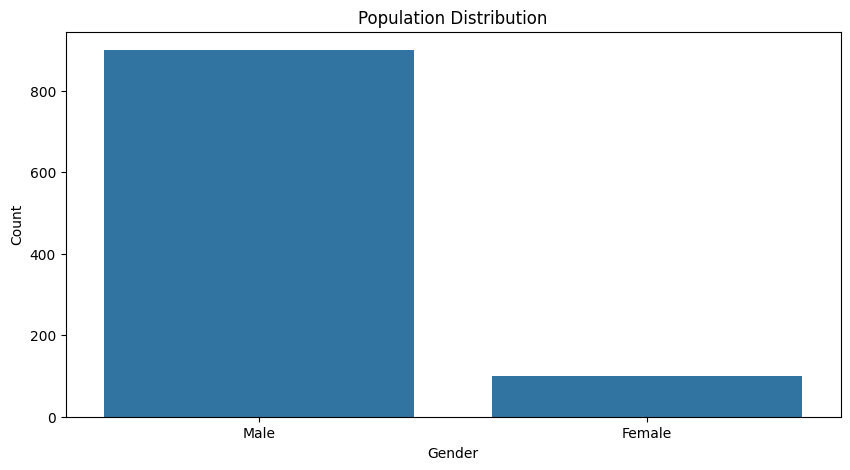

In [6]:
plot_population_distribution(population_df, 'Population Distribution')

### Simple Random Sampling

![Simple Random Sampling](Images/Simple_Random_Sampling.png)

In [7]:
# Simple Random Sampling
def simple_random_sampling(df, sample_size):
    return df.sample(n=sample_size)

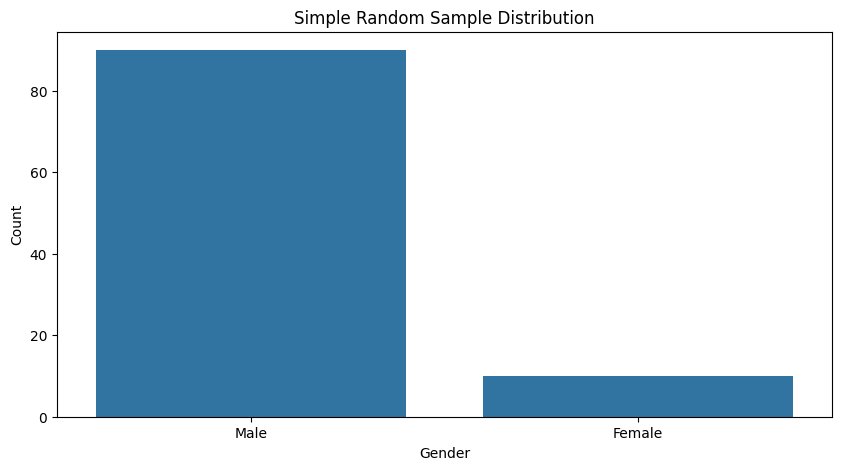

In [8]:
sample_size = 100
simple_random_sample = simple_random_sampling(population_df, sample_size)
plot_population_distribution(simple_random_sample, 'Simple Random Sample Distribution')

### Systematic Sampling

![Systematic Sampling](Images/Systematic_Sampling.png)

In [9]:
# Systematic Sampling
def systematic_sampling(df, interval):
    indices = np.arange(0, len(df), interval)
    return df.iloc[indices]

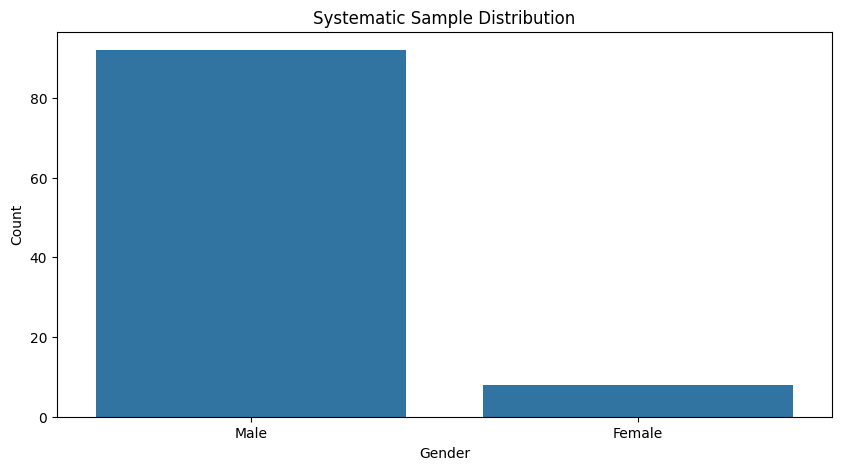

In [10]:
systematic_sample = systematic_sampling(population_df, 10)
plot_population_distribution(systematic_sample, 'Systematic Sample Distribution')

### Stratified Sampling

![Stratified Sampling](Images/Stratified_Sampling.png)

In [11]:
# Stratified Sampling
def stratified_sampling(df, sample_size):
    stratified_sample = df.groupby('Gender').apply(lambda x: x.sample(frac=sample_size/len(df), random_state=42)).reset_index(drop=True)
    return stratified_sample

C:\Users\hirew\AppData\Local\Temp\ipykernel_18456\1230738655.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Gender').apply(lambda x: x.sample(frac=sample_size/len(df), random_state=42)).reset_index(drop=True)


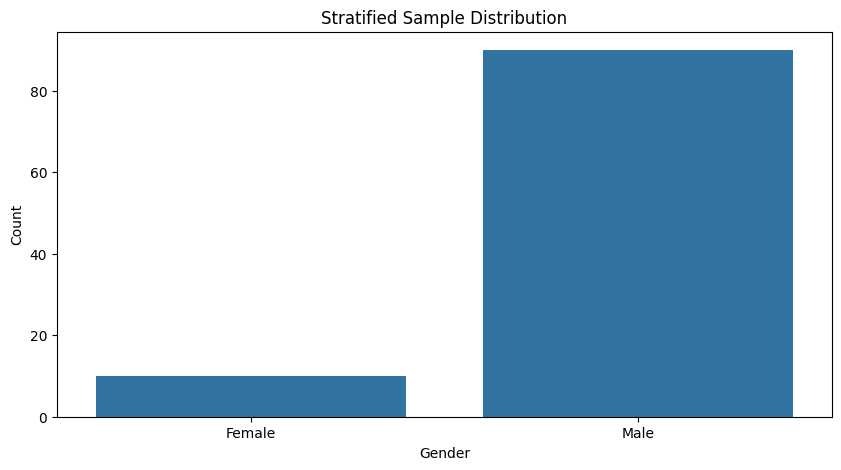

In [12]:
stratified_sample = stratified_sampling(population_df, sample_size)
plot_population_distribution(stratified_sample, 'Stratified Sample Distribution')

### Cluster Sampling

![Cluster Sampling](Images/Cluster_Sampling.png)

In [13]:
# Cluster Sampling
def cluster_sampling(df, num_clusters):
    # Assume we have two clusters: 'Fitness Class 1' and 'Fitness Class 2'
    clusters = np.random.choice(['Fitness Class 1', 'Fitness Class 2'], size=len(df))
    df['Cluster'] = clusters
    
    # Randomly select clusters
    selected_clusters = np.random.choice(df['Cluster'].unique(), size=num_clusters, replace=False)
    cluster_sample = df[df['Cluster'].isin(selected_clusters)]
    
    return cluster_sample

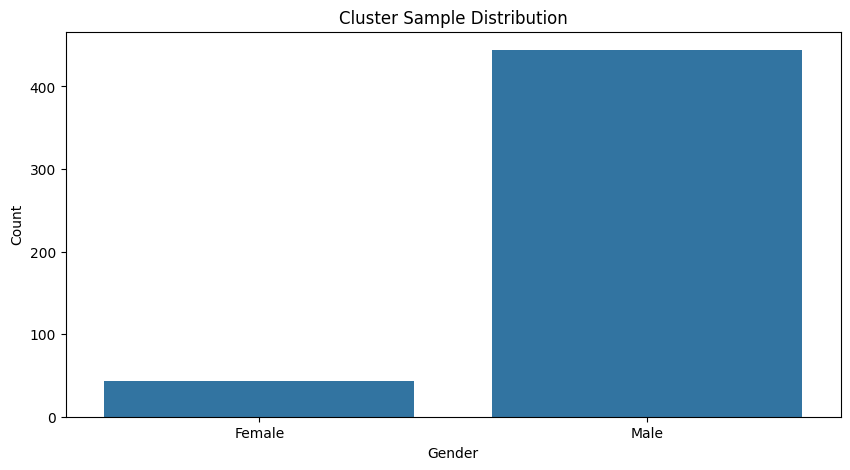

In [14]:
cluster_sample = cluster_sampling(population_df, 1)
plot_population_distribution(cluster_sample, 'Cluster Sample Distribution')

In [16]:
# Final Plotting
plt.show()